# Import Data

In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/Superuser/Desktop/Datasets/Warehouse_and_Retail_Sales.csv')

df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

# Replace categorical NaN with 'Anon'

In [50]:
df['SUPPLIER'] = df['SUPPLIER'].fillna('ANON')
df['ITEM TYPE'] = df['ITEM TYPE'].fillna('ANON')


In [51]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        3
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

# Drop NaN in RETAIL SALES (3)

In [61]:
df.dropna(subset=['RETAIL SALES'], inplace=True)

In [63]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

#  WAREHOUSE SALES by MONTH 

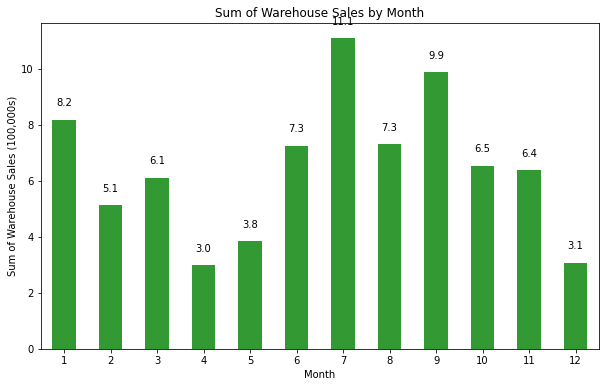

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale

# Calculate the sum of warehouse sales by month
sum_sales = df.groupby('MONTH')['WAREHOUSE SALES'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sum_sales.plot(kind='bar', color='green', alpha=.8)
plt.title('Sum of Warehouse Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Warehouse Sales (100,000s)')
plt.xticks(rotation=0)

# Create a custom y-axis formatter to display values in 100,000s
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/100000:.0f}')
ax.yaxis.set_major_formatter(formatter)

# Display the total sales for each month on the bars
for i, v in enumerate(sum_sales):
    ax.text(i, v + 50000, f'{v/100000:.1f}', ha='center', fontsize=10, c='black')

plt.show()


# K-Means 

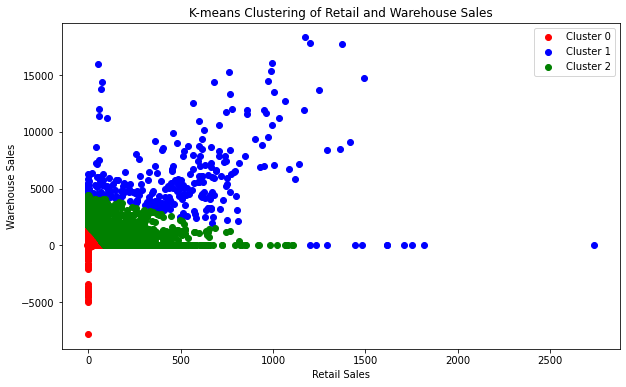

Cluster
0    302880
2      4465
1       297
Name: count, dtype: int64


In [72]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['RETAIL SALES', 'WAREHOUSE SALES']

# Extract the selected features
data = df[features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(scaled_data)

# Add the cluster assignments to the DataFrame
df['Cluster'] = cluster_assignments

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for cluster_id, color in enumerate(colors):
    clustered_data = df[df['Cluster'] == cluster_id]
    plt.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=f'Cluster {cluster_id}')
    
plt.title('K-means Clustering of Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.legend()
plt.show()

# Display the counts of data points in each cluster
print(df['Cluster'].value_counts())


# K-Means by months

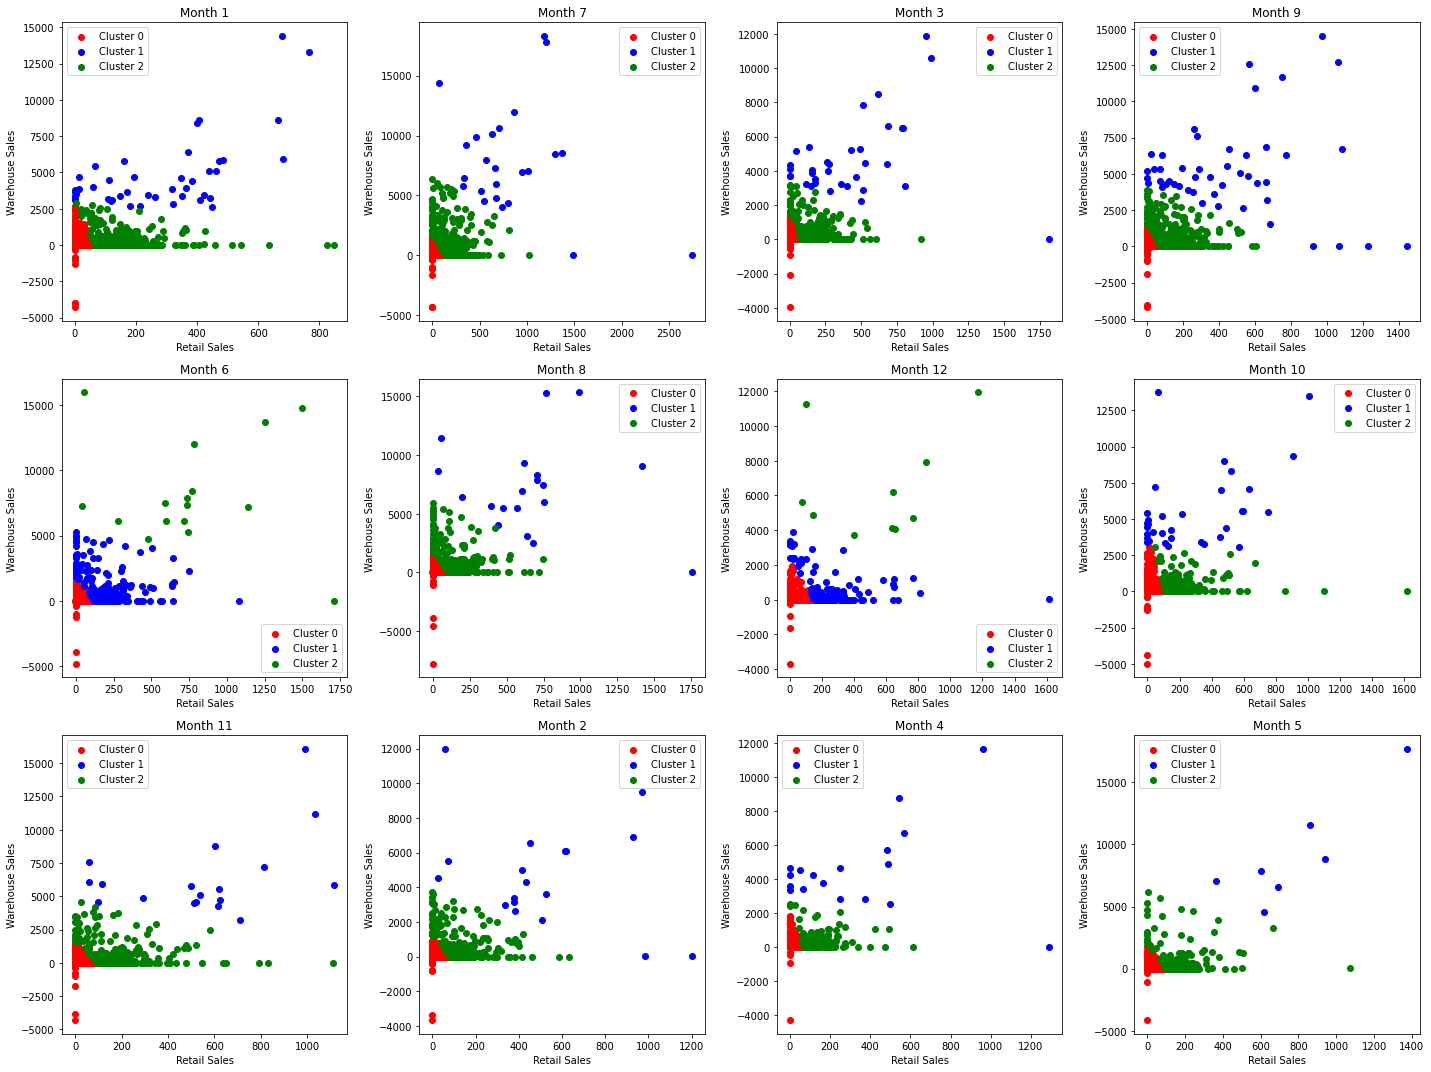

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the columns for clustering
data_for_clustering = df[['WAREHOUSE SALES', 'RETAIL SALES']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters
num_clusters = 3

# Get unique months
unique_months = df['MONTH'].unique()

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Loop through each unique month
for i, month in enumerate(unique_months):
    # Filter data for the current month
    filtered_data = df[df['MONTH'] == month]
    
    # Select the columns for clustering
    data_for_clustering = filtered_data[['WAREHOUSE SALES', 'RETAIL SALES']]
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    filtered_data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    # Get the axis for the current subplot
    ax = axes[i]
    
    # Visualize the clusters
    colors = ['red', 'blue', 'green']
    for cluster_id, color in enumerate(colors):
        clustered_data = filtered_data[filtered_data['Cluster'] == cluster_id]
        ax.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=f'Cluster {cluster_id}')
    
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Retail Sales')
    ax.set_ylabel('Warehouse Sales')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
